<a href="https://colab.research.google.com/github/Howida100/Simple-Project-/blob/main/Uber_Trips_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset used in this project is based on Uber trips from New York, a city with a very complex transportation system with a large residential community.

The dataset contains data of about 4.5 million uber pickups in New York City from April to September and 14.3 million pickups from January to June 2015

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/uber-raw-data-sep14.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

<ipython-input-1-0a1497810cc4>:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/uber-raw-data-sep14.csv")


,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.75,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.745,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [3]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat       Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201  -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00    40.75  -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559  -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00   40.745  -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145  -73.9444  B02512    1        0     0


<ipython-input-4-2282722f9d2a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Day"])


<Axes: xlabel='Day', ylabel='Density'>

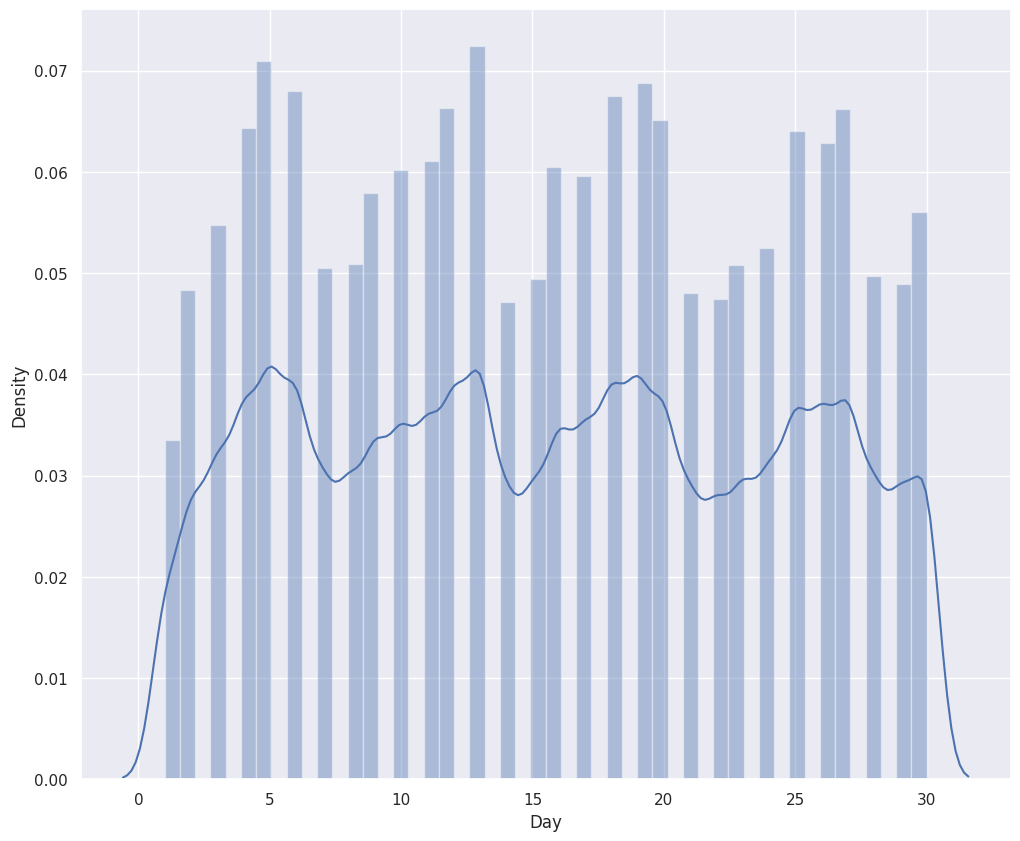

In [4]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

From figure above, it concludes that the Uber trips are rising on the working days and decreases on the weekend.

## **analaysing uber trip according to hours.**

<ipython-input-5-fe964bdaceca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Hour"])


<Axes: xlabel='Hour', ylabel='Density'>

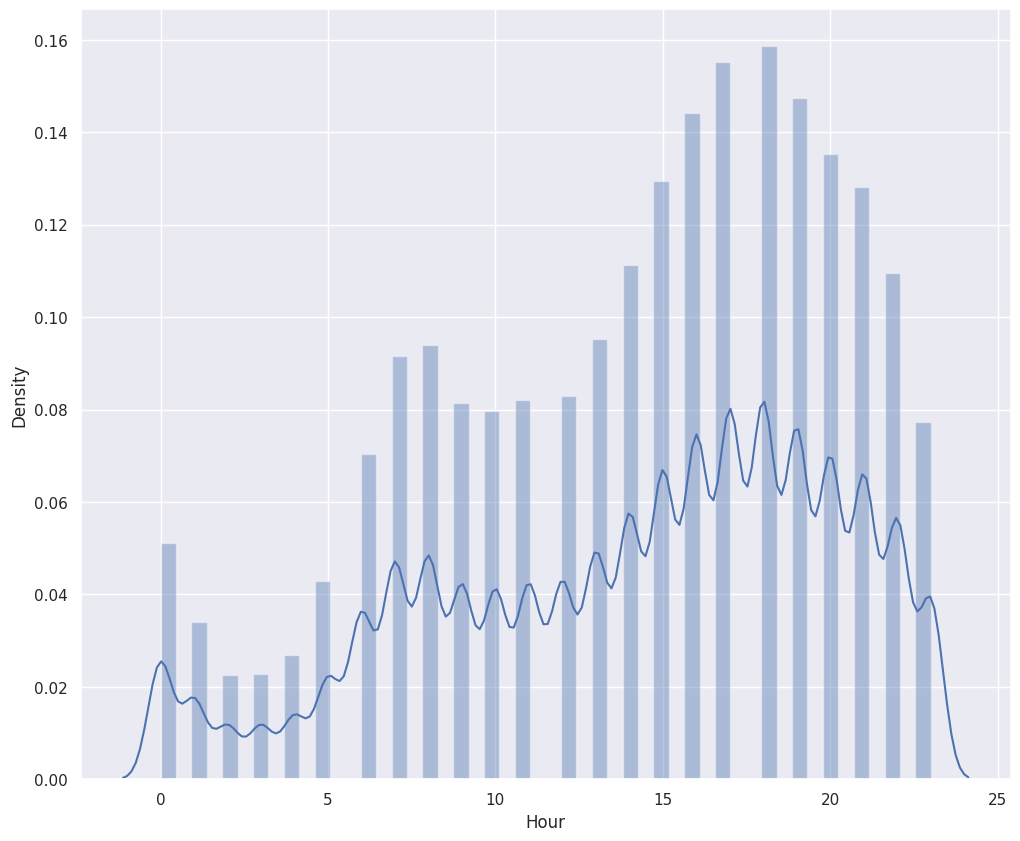

In [5]:
sns.distplot(data["Hour"])

from figure above, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing. 

<ipython-input-6-dfc05892656b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Weekday"])


<Axes: xlabel='Weekday', ylabel='Density'>

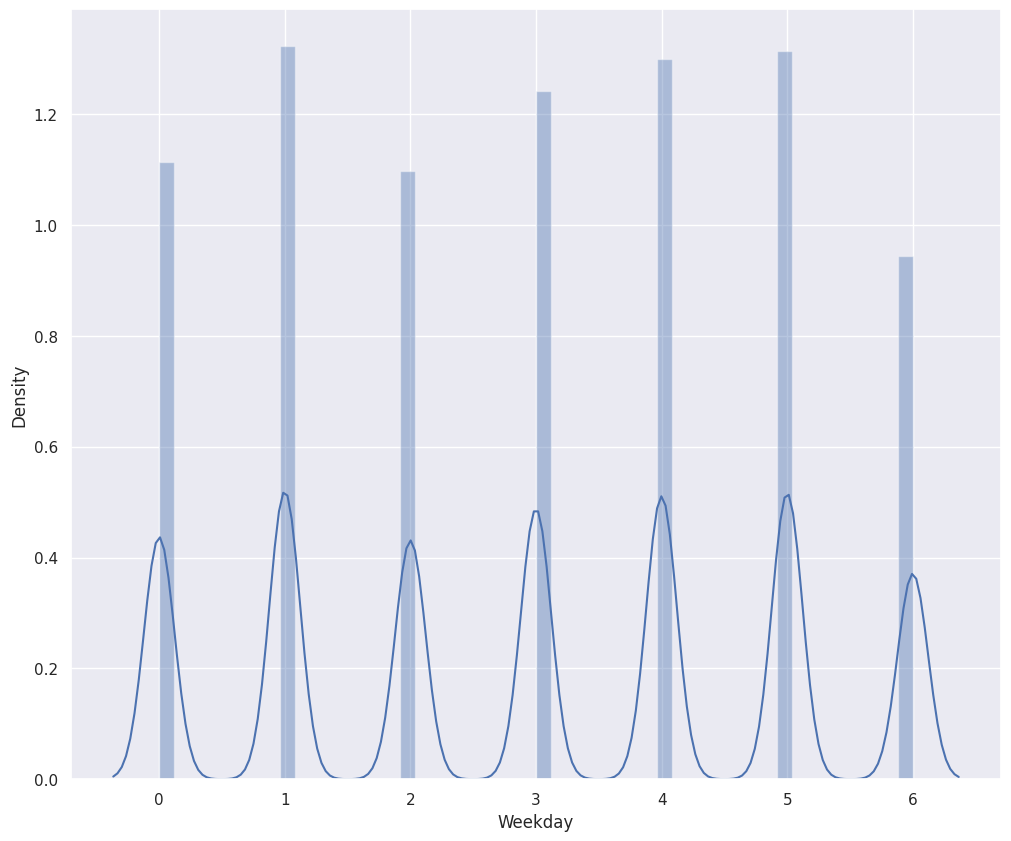

In [6]:
sns.distplot(data["Weekday"])

In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest. 


# **the correlation of hours and weekdays on the Uber trips:**

<Axes: xlabel='Hour', ylabel='Weekday'>

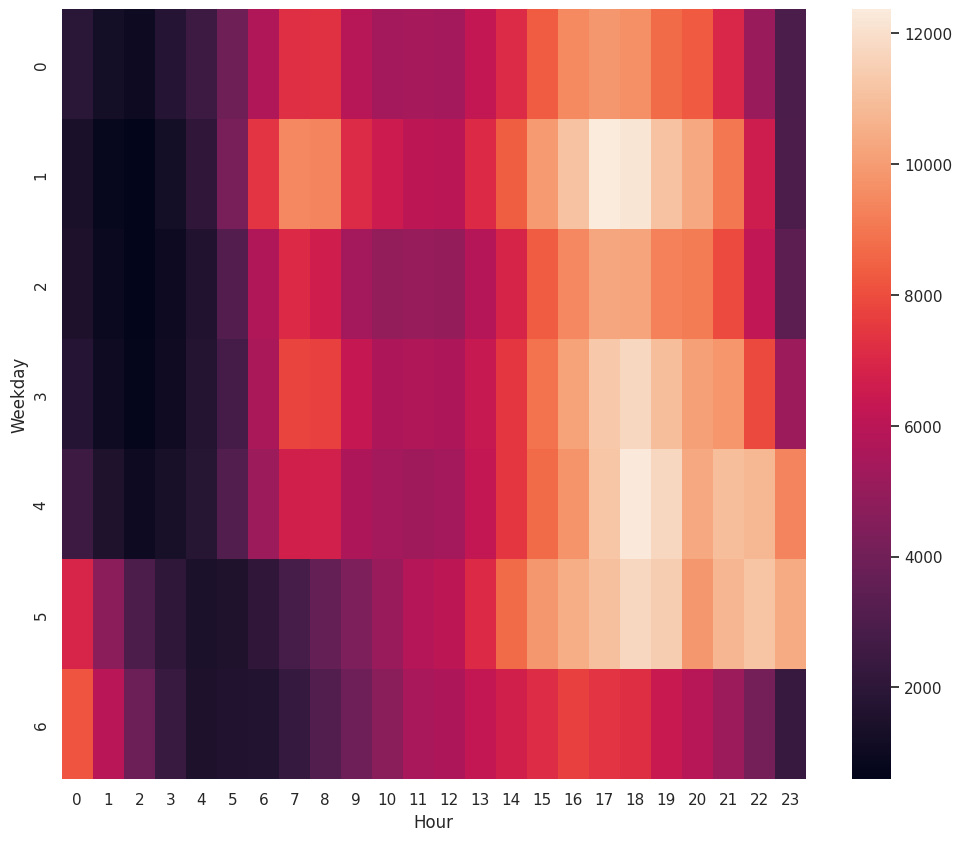

In [7]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

In this project, the following findings are obtained:

1-Monday is the most profitable day for Uber
2-On Saturdays less number of people use Uber
3-6 pm is the busiest day for Uber
4-On average a rise in Uber trips start around 5 am.
5-Most of the Uber trips originate near the Manhattan region in New York.
